## Exploring NYC Flights Data
In this Notebook, we will be working on our first dataset. We will be exploring 2013 flight data from airports in New York city. In the process of exploring this data, we will be covering basics on reading, processing, analyzing, and visualizing simple tabular datasets. This particular Notebook is mostly adopted from the [Introduction to Data and Probability](https://www.coursera.org/learn/probability-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph

## pandas and matplotlib
**pandas** is a software library for Python that is designed for data manipulation and data analysis. **matplotlib** is a software libary for data visualization, which allows us to easily render various types of graphs. We will be using these two libraries in this Notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset
For this notebook, we will working on a dataset called `nycflights`. This dataset contains on-time information for a random sample of flights departing from airports in New York City in 2013.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

**Question #1:** What does random sample mean in this case?


- This means that the data is a subset of the 2013 New York City departure flights taken without bias or preference to a category, *ie. random*

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 15 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`year`**: Year.
- **`month`**: Month.
- **`day`**: Day.
- **`dep_time`**: Departure Time, in Eastern time zone.
- **`dep_delay`**: Departure delay, in minutes.
- **`arr_time`**: Arrival time, in the local time zone.
- **`arr_delay`**: Arrival delay, in minutes.
- **`carrier`**: Carrier, abbreviated.
- **`tailnum`**: Tail number of the airplane.
- **`flight`**: Flight number.
- **`origin`**: Flight origin, airport code.
- **`dest`**: Flight destination, airport code.
- **`air_time`**: Time in the air, in minutes.
- **`distance`**: Distance between the departure and arrival airports, in miles.
- **`hour`**: Scheduled departure hour.
- **`minute`**: Scheduled departure minute.

## Reading the Dataset

Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [3]:
flights_df = pd.read_csv('nycflights.csv')

The dataset should now be loaded in the `flights_df` variable. `flights_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [4]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       32735 non-null  int64 
 1   month      32735 non-null  int64 
 2   day        32735 non-null  int64 
 3   dep_time   32735 non-null  int64 
 4   dep_delay  32735 non-null  int64 
 5   arr_time   32735 non-null  int64 
 6   arr_delay  32735 non-null  int64 
 7   carrier    32735 non-null  object
 8   tailnum    32735 non-null  object
 9   flight     32735 non-null  int64 
 10  origin     32735 non-null  object
 11  dest       32735 non-null  object
 12  air_time   32735 non-null  int64 
 13  distance   32735 non-null  int64 
 14  hour       32735 non-null  int64 
 15  minute     32735 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 4.0+ MB


**Question #2:** How many observations are there in the dataset?
- 32735


**Question #3:** How many variables are there in the dataset?
- 16


**Question #4:** What is the data type of the `carrier` column?
- object


**Question #5:** What is the data type of the `distance` column?
- int64


We can call the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to display the first `n` rows of the dataset.

In [5]:
flights_df.head(10)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
5,2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17
6,2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59
7,2013,8,13,1920,85,2032,71,B6,N284JB,1407,JFK,IAD,48,228,19,20
8,2013,9,26,725,-10,1027,-8,AA,N3FSAA,2279,LGA,MIA,148,1096,7,25
9,2013,4,30,1323,62,1549,60,EV,N12163,4162,EWR,JAX,110,820,13,23


We can call also call the [`tail`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) function to display the last `n` rows of the dataset.

Can you use the tail function to find out what is the `carrier` of the **last** row in the dataset?

In [6]:
# Write your code here
flights_df.tail(1).carrier.values[0]


'UA'

**Question #6:** What is the `carrier` of the last row of the dataset?
- UA


We can get the columns of the dataset by accessing the [`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) property of the `DataFrame`.

In [7]:
flights_df.columns


Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

## Exploratory Analysis

The `nycflights` data frame is a massive trove of information. Let's think about some questions we might want to answer with these data:

- We might want to find out how delayed flights headed to a particular destination tend to be. 
- We might want to evaluate how departure delays vary over months. 
- We might want to determine which of the three major NYC airports has a better on time percentage for departing flights.

In the following sections we will attempt to answer these questions using the dataset we have loaded.

### How Delayed Are Flights Headed to a Particular Destination?

To answer this question, the variables of interest are:
- **`arr_delay`**: Arrival delay, in minutes
- **`dest`**: Flight destination, airport code

We can select a specific column from a `DataFrame` as a `Series` by using square brackets. For example, we can get the arrival time delays of the various flights (in minutes) in the dataset by accessing the `arr_delay` column:

In [8]:
flights_df["arr_delay"]


0        -4
1        10
2        11
3       -34
4        -8
         ..
32730   -28
32731     8
32732   -19
32733    60
32734   -23
Name: arr_delay, Length: 32735, dtype: int64

Note that the data type of the column above is a `Series`.

In [9]:
type(flights_df["arr_delay"])


pandas.core.series.Series

**Practice!** Write code to select the `dest` column as a series.

In [10]:
# Write your code here
flights_df['dest']


0        LAX
1        SJU
2        LAX
3        TPA
4        ORF
        ... 
32730    PIT
32731    LAS
32732    IAH
32733    CHS
32734    CLE
Name: dest, Length: 32735, dtype: object

In [16]:
flights_df.iloc[-2]






year           2013
month            10
day              15
dep_time        844
dep_delay        56
arr_time       1045
arr_delay        60
carrier          B6
tailnum      N258JB
flight         1273
origin          JFK
dest            CHS
air_time         93
distance        636
hour              8
minute           44
Name: 32733, dtype: object

**Question #7:** What is the `dest` of the second to the last row of the dataset?
- CHS


We can also select a list of columns from the dataset by providing a list instead of the name of a single column. For example, we can select both the `arr_delay` and `dest` columns at the same time as follows:

In [17]:
flights_df[["arr_delay", "dest"]]


,arr_delay,dest
0,-4,LAX
1,10,SJU
2,11,LAX
3,-34,TPA
4,-8,ORF
...,...,...
32730,-28,PIT
32731,8,LAS
32732,-19,IAH
32733,60,CHS


Note that by doing this, we are getting a `DataFrame` (albeit a smaller one) instead of a `Series`.

In [ ]:
type(flights_df[["arr_delay", "dest"]])

A good way to get an understanding of numerical values in the dataset is to use a histogram. Let's use a histogram to visualize the arrival time delay across all the flights in the dataset. To do this, we will call the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function of the `DataFrame` which in turn calls the appropriate matplotlib function.

Note that we also call the [`show`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html) function of matplotlib to display only the graph.

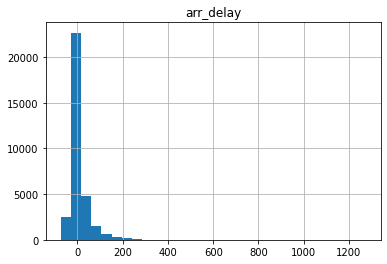

In [18]:
flights_df.hist("arr_delay", bins=30)

plt.show()

You can play around the `bins` parameter by changing its value above.

Let's say we want to investigate the arrival time delays for flights headed to Raleigh-Durham (RDU) only. To do this, we have to consider **only the observations in which the destination is `RDU`**.

We can filter observations based on certain conditions by specifying a condition as follows.

In [19]:
flights_df[flights_df["dest"] == "RDU"]


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
94,2013,6,20,1729,23,1903,15,EV,N27962,5977,EWR,RDU,68,416,17,29
113,2013,5,5,1503,13,1650,15,MQ,N827MQ,4403,JFK,RDU,76,427,15,3
161,2013,11,10,1907,7,2053,13,MQ,N857MQ,3591,LGA,RDU,68,431,19,7
195,2013,3,3,1505,15,1641,1,MQ,N835MQ,4403,JFK,RDU,68,427,15,5
290,2013,10,25,749,-6,916,-19,MQ,N821MQ,3363,JFK,RDU,68,427,7,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,2013,6,22,1722,22,1848,1,EV,N13997,4121,EWR,RDU,68,416,17,22
32650,2013,8,24,1150,-10,1329,-16,MQ,N725MQ,3404,LGA,RDU,69,431,11,50
32651,2013,2,14,2052,-8,2227,-8,MQ,N734MQ,4507,LGA,RDU,70,431,20,52
32719,2013,11,22,1159,-6,1344,-6,MQ,N512MQ,3404,LGA,RDU,65,431,11,59


As you can see, the above query resulted into a new `DataFrame` containing only the flights where `dest` is `RDU`. For now, we will assign this new `DataFrame` into a new variable for convenience.

In [21]:
flights_to_rdu_df = flights_df[flights_df["dest"] == "RDU"]


**Practice!** Can you plot a histogram of arrival time delays only for flights to RDU?

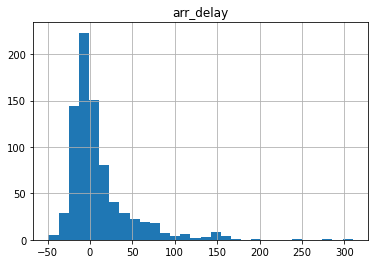

In [22]:
# Write your code here
flights_to_rdu_df.hist("arr_delay", bins=30)
plt.show()



**Question #8:** Which best describes the shape of the distribution of the arrival time delays for flights to RDU? (a) symmetric (b) positively-skewed (c) negatively-skewed (d) uniform
- (b) positively-skewed


We can also aggregate some summary statistics regarding the arrival time delay using the [`agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function. Note that for this function, we passed a dictionary where the key is a column name and the corresponding value is a list of functions that we want to apply to that column. We can pass either an actual function **or** a string containing the name of a common function such as `"mean"` or `"std"`. In this case, we want to get the mean, standard deviation and length of the `arr_delay` column.

In [23]:
flights_to_rdu_df.agg({"arr_delay": ["mean", "std", "count"]})


,arr_delay
mean,9.825218
std,38.914193
count,801.000000


**Question #9:** What is the average arrival time delay in minutes of flights headed to RDU?
- 9.825218


Next, let's try to do the same thing for flights to San Francisco (SFO) airport in the month of February. We can filter observations using multiple criteria by using `&` (and) and `|` (or). Note that these are not the normal `and` and `or` operators in Python. These are bitwise operators that perform element-wise operations on two boolean lists. 

In [24]:
flights_to_sfo_in_feb_df = flights_df[(flights_df["dest"] == "SFO") & (flights_df["month"] == 2)]
flights_to_sfo_in_feb_df


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
535,2013,2,18,1527,57,1903,48,DL,N711ZX,1322,JFK,SFO,358,2586,15,27
813,2013,2,3,613,14,1008,38,UA,N502UA,691,JFK,SFO,367,2586,6,13
1259,2013,2,15,955,-5,1313,-28,DL,N717TW,1765,JFK,SFO,338,2586,9,55
1527,2013,2,18,1928,15,2239,-6,UA,N24212,1214,EWR,SFO,353,2565,19,28
1873,2013,2,24,1340,2,1644,-21,UA,N76269,1111,EWR,SFO,341,2565,13,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,2013,2,21,1745,0,2106,-14,AA,N329AA,177,JFK,SFO,348,2586,17,45
29790,2013,2,3,1055,-5,1405,-20,UA,N510UA,642,JFK,SFO,351,2586,10,55
29806,2013,2,25,1855,0,2220,-20,VX,N624VA,29,JFK,SFO,367,2586,18,55
30563,2013,2,6,1654,-6,2015,-34,DL,N624AG,31,JFK,SFO,355,2586,16,54


Can you use the `agg` function to determine the **median** arrival delay of flights to SFO during the month of February?

In [25]:
# Write your code here
flights_to_sfo_in_feb_df.agg({'arr_delay': ['median']})


,arr_delay
median,-11.0


**Question #10:** What is the median arrival delay of flights to SFO during the month of February?
- -11.0


Now, can you find out the mean arrival delay of flights to Hartsfield–Jackson Atlanta (ATL) airport from the month of September to December?

In [26]:
# Write your code here
flights_to_atl_in_sept_to_dec_df = flights_df[(flights_df['dest'] == 'ATL') & (flights_df['month'] >= 9)]
flights_to_atl_in_sept_to_dec_df.agg({'arr_delay': ['mean']})


,arr_delay
mean,9.342007


**Question #11:** What is the mean arrival delay of flights to ATL from September to December?
- 9.342007


### Which Month Has the Longest Delay in Departures in New York Airports?

Sometimes, we may want to form groups in the datasets and compute summary statistics for each group. For instance, to determine which month has a longest average delay in departures in the dataset, we need to compute the average for each month.

To do this, we can use the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) function. By providing a column name to this function, it will group the dataset based on the value of each observation for that function.

In [27]:
flights_df.groupby("month")


As you can see, calling `groupby` returns a `DataFrameGroupBy` object. We then call the `agg` function to this object so that it performs the aggregation **per group** instead of using the whole dataset.

In [28]:
flights_df.groupby("month").agg({"dep_delay": ["mean", "std"]})


dep_delay           
            mean        std
month                      
1      10.233333  42.386208
2      10.687227  33.115879
3      13.517602  40.291106
4      14.554477  43.421545
5      13.264800  38.254973
6      20.350293  53.514525
7      20.754559  47.777209
8      12.619097  39.221086
9       6.872436  35.344786
10      5.880374  29.369757
11      6.103183  27.633642
12     17.368189  43.013227

You can sort a `DataFrame` by a column using the `sort_values` function. Let's try to sort the resulting table above in descending order so that we can easily see which month has the longest average departure delay.

In [29]:
flights_df.groupby("month").agg({"dep_delay": ["mean", "std"]}).sort_values(("dep_delay", "mean"), ascending=False)


dep_delay           
            mean        std
month                      
7      20.754559  47.777209
6      20.350293  53.514525
12     17.368189  43.013227
4      14.554477  43.421545
3      13.517602  40.291106
5      13.264800  38.254973
8      12.619097  39.221086
2      10.687227  33.115879
1      10.233333  42.386208
9       6.872436  35.344786
11      6.103183  27.633642
10      5.880374  29.369757

Note that `sort_value` accepts the variable name you want to sort as the parameter. In this case, we pass in the **tuple** `("dep_delay", "mean")` because if you look at the `DataFrame` in the previous cell, we have a hierharchical structure for the column names where the first level is `dep_delay`, and the `mean` column is under that column.

**Question #12:** Which month has the longest average delay in departure?
- July


**Practice!** Find out which month has the highest median of average delay in departure time. Make sure to sort the median values per month in descending order.

In [30]:
# Write your code here
def mode(x):
  return x.value_counts().index[0];


def percent_delay(x):
  return len(x[x.values > 0]) / len(x);

flights_df.groupby("month").agg({'dep_delay': ['median', 'mean', mode, percent_delay] }).sort_values(("dep_delay", "median"), ascending=False)



dep_delay                              
         median       mean mode percent_delay
month                                        
12            1  17.368189   -2      0.505523
6             0  20.350293   -4      0.463031
7             0  20.754559   -3      0.486506
3            -1  13.517602   -3      0.396305
5            -1  13.264800   -5      0.399149
8            -1  12.619097   -3      0.395139
1            -2  10.233333   -5      0.375479
2            -2  10.687227   -3      0.392388
4            -2  14.554477   -2      0.373607
11           -2   6.103183   -5      0.327113
9            -3   6.872436   -3      0.281238
10           -3   5.880374   -5      0.298890

**Question #13:** If you can choose which month you want to travel from NYC, using only the departure delay as the basis for your decision, which month is the **worst** month to travel?
- December because it has the highest median. Refer to answer in next question


**Question #14:** In choosing the worst month to travel from NYC (previous question), would it be better to use mean or median? Why?
- Median due to being less sensitive to outliers. Although the values are just -1, 0, 1, the median can tell us a lot more in this case since the data is positively skewed. This means the mean may be influenced by a few outliers, but the fact that December has a median of 1 means that the "center" value remains to be better than those in other months.


We can also visualize the departure delays per month by using a side-by-side boxplot from the [`boxplot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function of matplotlib. Notice that you can control the size of the figures in matplotlib using the `figsize` parameter (also works in other plots).

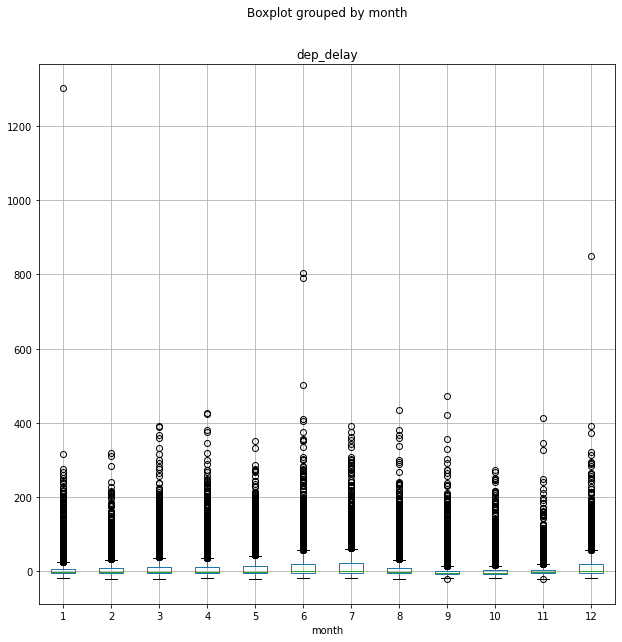

In [31]:
flights_df.boxplot("dep_delay", by="month", figsize=(10,10))
plt.show()


We can zoom in a little by specifying the limits of the y axis to be displayed in the graph (also applies to other types of graphs). **Warning:** Note that this truncates some of the data out of view. Please be aware about this.

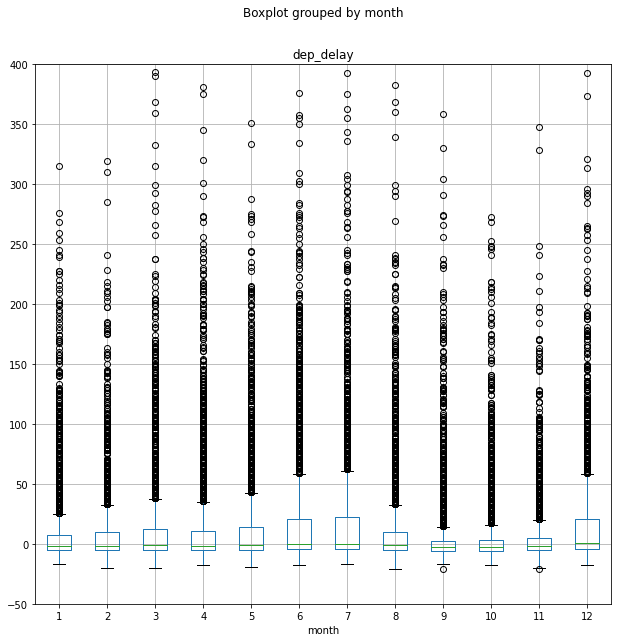

In [32]:
flights_df.boxplot("dep_delay", by="month", figsize=(10,10))
plt.ylim((-50, 400))
plt.show()


### What is the On-Time Departure Rate for NYC Airports?

Finally, let's try to find out the on-time departure rate for airports in New York City for the year 2013. The on-time departure rate of an airport is the percentage of flights that left on time over all the flights that departed from that airport.

Obviously, to be able to answer this question we must first perform some preliminary computations.

- We need to define whether each flight is "on time" or "delayed".
- We need to compute the percentage of "on time" flights per airport.

First, let try to classify each flight as "on time" or "delayed". For the purposes of this Notebook, we will define a flight to be "delayed" if the departure delay (`dep_delay`) is greater than 0. Otherwise, the flight is considered to be "on time".

We will now **add a column** to the dataset called `dep_type`. This column will contain the status of the departure ("on time" or "delayed"). In pandas, we can add columns easily by assigning the list of values of the new column to the `DataFrame` indexed with the new column name.

In [33]:
flights_df["dep_type"] = np.where(flights_df["dep_delay"] <= 0, "on time", "delayed")

flights_df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_type
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,delayed
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,on time
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,on time
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,on time
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,on time
5,2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17,on time
6,2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59,delayed
7,2013,8,13,1920,85,2032,71,B6,N284JB,1407,JFK,IAD,48,228,19,20,delayed
8,2013,9,26,725,-10,1027,-8,AA,N3FSAA,2279,LGA,MIA,148,1096,7,25,on time
9,2013,4,30,1323,62,1549,60,EV,N12163,4162,EWR,JAX,110,820,13,23,delayed


If we scroll to the rightmost part of the `DataFrame`, we can see that a new column has been added called `dep_type`, containing the departure status for each flight.

The value of `dep_type` is evaluated using the NumPy function `np.where`, which takes in three parameters. The first parameter is a vector of boolean values. In this case, we specified `flights_df["dep_delay"] > 0`. This is like an element-wise `Series` to scalar operation, which compares each value of `dep_delay` to 0 and results into a `Series` of boolean values. The second parameter is the value to be assigned for every `True` value in the vector and the third parameter is the value to be assigned for every `False` value in the vector.

Now that we know which flights are on time and which flights are not, we have to group the data frame by `origin`, since we want to compute the on-time departure rate for each NYC airport. Then, we can use the `agg` function to compute the on-time departure rate for each group.

In [34]:
flights_df.groupby("origin").agg({"dep_type": [("on_time_rate", lambda x: sum(x == "on time") / len(x))]})


,dep_type
,on_time_rate
origin,
EWR,0.548806
JFK,0.618427
LGA,0.669216


Here, instead of using a predefined function like `"mean"`, we define a custom lambda function that computes the on-time ratio:

`lambda x: sum(x == "on time") / len(x))`

In this function, `x` is the `dep_type` column `Series`. `x == "on time"` performs element-wise vector to scalar operation and returns a boolean vector. The `sum` function then counts how many of those elements are `True`. Then, this number is divided by the total number of elements in `x`, resulting in the on-time ratio in each group.

Note that the function is passed as a tuple to `agg`, where the first element contains the name of the column "`on_time_rate`" and the second column contains the lambda function itself.

**Question #15:** If you were selecting which airport to fly from in NYC simply based on the on-time departure rate, which airport would you choose?
- LGA


## Test Yourself

Accomplish the following tasks using the `nycflights` dataset. To reset everything, the next cell reloads the dataset from the `.csv` file again (you may need to change the path). Make sure that all succeeding code from this point onwards works on the original state of the dataset.

In [35]:
flights_df = pd.read_csv('nycflights.csv')


### What percentage of the dataset are flights that depart on time but arrive late?

Figure out what percentage of the observations in the dataset are flights that have a departure delay of 0 or less but have an arrival delay of more than 0.

In [36]:
# Write your code here
TOTAL_FLIGHTS = len(flights_df)
TOTAL_DEP_ONTIME_ARR_LATE = len(flights_df[(flights_df['dep_delay'] <= 0) & (flights_df['arr_delay'] > 0)])

str((TOTAL_DEP_ONTIME_ARR_LATE / TOTAL_FLIGHTS) * 100) + ' %'




'12.741713762028409 %'

**Question #16:** What is the percentage?
- 12.741713762028409 %


### What percentage of the dataset are flights that arrive on time but depart late?

Figure out what percentage of the observations in the dataset are flights that have an arrival delay of 0 or less but have an departure delay of more than 0.

In [37]:
# Write your code here
TOTAL_DEP_ONTIME_ARR_LATE = len(flights_df[(flights_df['arr_delay'] <= 0) & (flights_df['dep_delay'] > 0)])


str((TOTAL_DEP_ONTIME_ARR_LATE / TOTAL_FLIGHTS) * 100) + ' %'



'10.716358637543912 %'

**Question #17:** What is the percentage?
- 10.716358637543912 %


### Which aircraft has the fastest average speed?

Add a column to the data frame so that it includes a new variable that contains the average speed, `avg_speed` traveled by the plane for each flight (in mph).

**Hint:** Average speed can be calculated as distance divided by number of hours of travel, and note that `air_time` is given in **minutes**, not hours.

In [38]:
# Write your code here
flights_df['avg_speed'] = flights_df['distance'] / (flights_df['air_time'] / 60)
flights_df


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,474.440895
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,443.888889
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,394.946809
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,446.666667
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,355.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,2013,10,8,752,-8,921,-28,9E,N8505Q,3611,JFK,PIT,63,340,7,52,323.809524
32731,2013,7,7,812,-3,1043,8,DL,N6713Y,1429,JFK,LAS,286,2248,8,12,471.608392
32732,2013,9,3,1057,-1,1319,-19,UA,N77871,1545,EWR,IAH,180,1400,10,57,466.666667
32733,2013,10,15,844,56,1045,60,B6,N258JB,1273,JFK,CHS,93,636,8,44,410.322581


Sort the `DataFrame` descendingly using the `avg_speed` column.

In [44]:
# Write your code here
flights_df.sort_values('avg_speed', ascending=False)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
5066,2013,5,25,1709,9,1923,-14,DL,N666DN,1499,LGA,ATL,65,762,17,9,703.384615
1266,2013,2,21,2355,-3,412,-26,B6,N779JB,707,JFK,SJU,172,1598,23,55,557.441860
21580,2013,11,16,2349,-10,402,-38,B6,N571JB,1503,JFK,SJU,173,1598,23,49,554.219653
1128,2013,2,22,831,4,1258,-18,B6,N568JB,403,JFK,SJU,175,1598,8,31,547.885714
12261,2013,12,5,1628,-2,2045,-45,AA,N5EHAA,95,JFK,SJU,175,1598,16,28,547.885714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,2013,5,11,738,-7,842,-10,US,N957UW,1821,LGA,PHL,49,96,7,38,117.551020
396,2013,5,24,553,-7,712,17,US,N957UW,1289,LGA,PHL,50,96,5,53,115.200000
1373,2013,4,22,946,-9,1134,26,9E,N8623A,3608,JFK,PHL,50,94,9,46,112.800000
17253,2013,7,19,559,-1,713,18,US,N959UW,1629,LGA,PHL,52,96,5,59,110.769231


**Question #18:** What is the tail number of the plane with the fastest `avg_speed`? And what is the speed in mph?


- **Tail number:** N666DN
- **Average Speed (mph):** 703.384615


You may Google this tail number to find out more about the aircraft.

*Not sure what we're looking for, but I found [this](http://rstudio-pubs-static.s3.amazonaws.com/309346_faf0e50bebdd4fbf92ee0704cdeb8c3b.html) >_<"*


### Which aircraft has the slowest average speed?

Sort the `DataFrame` ascendingly using the `avg_speed` column.

In [47]:
# Write your code here
flights_df.sort_values('avg_speed', ascending=True)



,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,avg_speed
24516,2013,1,28,1917,52,2118,103,US,N755US,1860,LGA,PHL,75,96,19,17,76.800000
17253,2013,7,19,559,-1,713,18,US,N959UW,1629,LGA,PHL,52,96,5,59,110.769231
1373,2013,4,22,946,-9,1134,26,9E,N8623A,3608,JFK,PHL,50,94,9,46,112.800000
396,2013,5,24,553,-7,712,17,US,N957UW,1289,LGA,PHL,50,96,5,53,115.200000
5544,2013,5,11,738,-7,842,-10,US,N957UW,1821,LGA,PHL,49,96,7,38,117.551020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2013,2,22,831,4,1258,-18,B6,N568JB,403,JFK,SJU,175,1598,8,31,547.885714
28479,2013,3,9,2214,79,229,43,B6,N656JB,701,JFK,SJU,175,1598,22,14,547.885714
21580,2013,11,16,2349,-10,402,-38,B6,N571JB,1503,JFK,SJU,173,1598,23,49,554.219653
1266,2013,2,21,2355,-3,412,-26,B6,N779JB,707,JFK,SJU,172,1598,23,55,557.441860


**Question #19:** What is the tail number of the plane with the slowest `avg_speed`? And what is the speed in mph?
- **Tail number:** N755US
- **Average Speed (mph):** 76.800000


### Which quarter has the lowest average departure delay?

Assuming the following:
- Q1: January to March
- Q2: April to June
- Q3: July to September
- Q4: October to December

Figure out which quarter has the lowest average departure delay across all aiports in NYC.

In [48]:
# Write your code here
def get_quarter(row):
  if(row['month'] <= 3):
    return 'Q1';

  if(row['month'] <= 6):
    return 'Q2';

  if(row['month'] <= 9):
    return 'Q3'

  return 'Q4'

flights_df['quarter'] = flights_df.apply(get_quarter, axis=1);

flights_df.groupby('quarter').agg({'dep_delay': ['mean']}).sort_values(('dep_delay', 'mean'))



,dep_delay
,mean
quarter,
Q4,9.697708
Q1,11.580425
Q3,13.450199
Q2,16.017879


**Question #20:** Which quarter has the lowest average departure delay?
- Q4
